In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define file path
file_path = "/content/Names_2010Census.csv"

# Load CSV into DataFrame
df = pd.read_csv(file_path)

# Display the first few rows
df.head()

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
0,SMITH,1,2442977,828.19,828.19,70.9,23.11,0.5,0.89,2.19,2.4
1,JOHNSON,2,1932812,655.24,1483.42,58.97,34.63,0.54,0.94,2.56,2.36
2,WILLIAMS,3,1625252,550.97,2034.39,45.75,47.68,0.46,0.82,2.81,2.49
3,BROWN,4,1437026,487.16,2521.56,57.95,35.6,0.51,0.87,2.55,2.52
4,JONES,5,1425470,483.24,3004.80,55.19,38.48,0.44,1,2.61,2.29


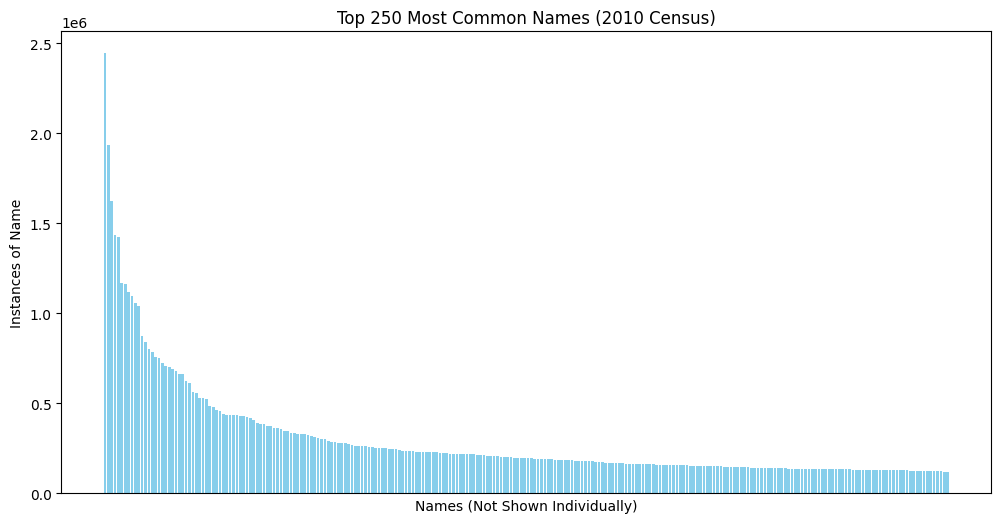

In [ ]:
# Sort by frequency column (assuming it's named 'Frequency')
top_n = 250
df_top = df.head(top_n)


# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_top["name"], df_top["count"], color="skyblue")
plt.xticks([])
plt.ylabel("Instances of Name")
plt.xlabel("Names (Not Shown Individually)")
plt.title(f"Top {top_n} Most Common Names (2010 Census)")
plt.show()

In [ ]:
bottom_n = 100
df_bottom = df.sort_values(by="count", ascending=True)
df_bottom_n = df_bottom.head(bottom_n)


# Plot
# plt.figure(figsize=(12, 6))
# plt.bar(df_bottom_n["name"], df_bottom_n["count"], color="skyblue")
# plt.xticks([])
# plt.ylabel("Count")
# plt.title(f"Top {bottom_n} Most Common Names (2010 Census)")
# plt.show()

df_bottom_n

,name,rank,count,prop100k,cum_prop100k,pctwhite,pctblack,pctapi,pctaian,pct2prace,pcthispanic
162251,DONLEA,160975,100,0.03,90062.99,94,0,0,0,0,6
161393,STILO,160975,100,0.03,90033.91,91,(S),0,0,(S),(S)
161394,STRIEGLER,160975,100,0.03,90033.94,93,0,(S),0,(S),(S)
161395,STEUP,160975,100,0.03,90033.98,97,(S),0,0,0,(S)
161396,STRULOVITCH,160975,100,0.03,90034.01,97,(S),0,0,0,(S)
...,...,...,...,...,...,...,...,...,...,...,...
161327,SUCO,160975,100,0.03,90031.67,15,5,(S),0,(S),76
161328,SUMMERBELL,160975,100,0.03,90031.70,82,11,(S),0,5,(S)
161321,TANICO,160975,100,0.03,90031.47,97,(S),0,0,0,(S)
161329,SYMMONS,160975,100,0.03,90031.74,86,10,0,0,(S),(S)


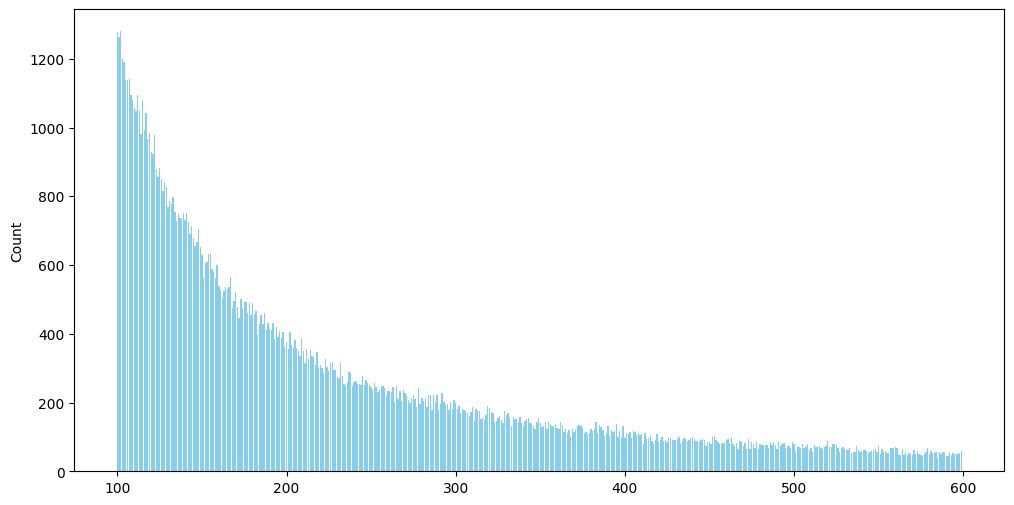

In [ ]:
df_count_distribution = df.groupby("count").size().reset_index(name="num_names")

df_count_dist_hist = df_count_distribution.head(500)

# Plot
plt.figure(figsize=(12, 6))
plt.bar(df_count_dist_hist["count"], df_count_dist_hist["num_names"], color="skyblue")
plt.xticks()
plt.ylabel("Count")
plt.show()

In [ ]:
data_for_regression = df_count_dist_hist

new_row = pd.DataFrame({"count": [1], "num_names": [3.906*10**6]})  # Example values

data_for_regression = pd.concat([data_for_regression, new_row], ignore_index=True)

In [ ]:
data_for_regression.head(301)

,count,num_names
0,100,1279.0
1,101,1263.0
2,102,1280.0
3,103,1198.0
4,104,1190.0
...,...,...
296,396,99.0
297,397,116.0
298,398,98.0
299,399,132.0


9.849946085131108
0.24241003087996982


<ipython-input-26-b04a4a5f88fe>:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


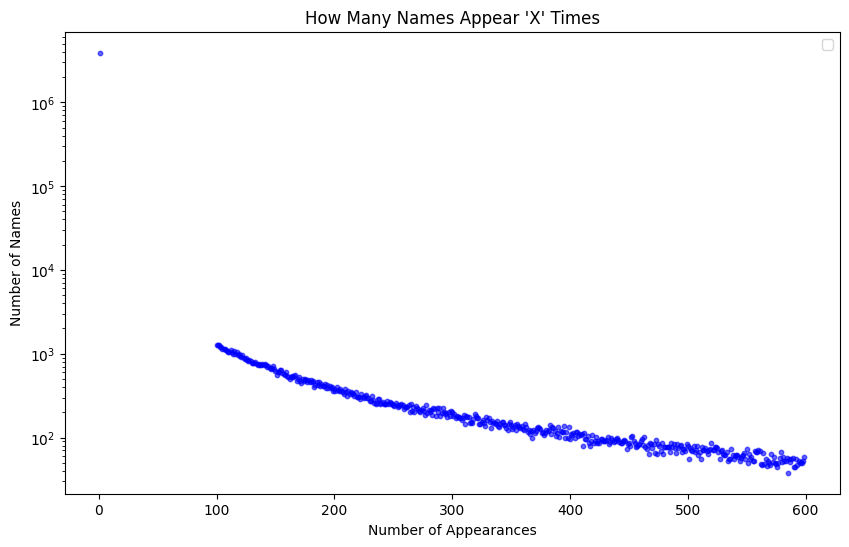

In [ ]:
# Extract data
x_data = data_for_regression["count"].values
y_data = data_for_regression["num_names"].values

# Initialize sums and count_list
people_sum = 0
name_sum = 0
count_list = []

# Define parameters for the exponential model
a = 4345.9
b = .98785

# Define function for a_n
def exp_funct(x):
    return a *b**(x)

# Generate values for x = 2 to 98
x_generated = np.arange(98, 1, -1)  # X values from 2 to 98
for i in range(98, 1, -1):  # i from 98 down to 2
    a_i = exp_funct(i)
    count_list.append(a_i)
    people_sum += i * a_i
    name_sum += a_i

print(people_sum / 10**6)
print(name_sum / 10**6)

# Plot original data points
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, color="blue", s=10, alpha=0.6)

# Add generated points from count_list
# plt.scatter(x_generated, count_list, label="Generated Points", color="red", s=10, alpha=0.6)

# Log scale for better visualization
plt.yscale("log")
plt.xlabel("Number of Appearances")
plt.ylabel("Number of Names")
plt.title("How Many Names Appear 'X' Times")
plt.legend()
plt.show()

23.922842675829383
4.654934046100743


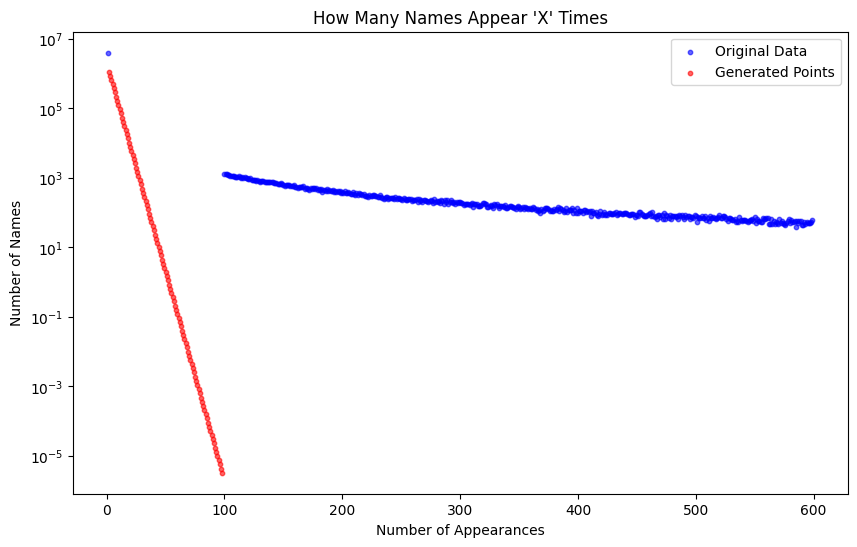

In [ ]:
# Initialize sums and count_list
people_sum = 0
name_sum = 0
count_list = []

# Define parameters for the exponential model
a_1 = 1.48282 * 10**6
r = 0.75841

# Define function for a_n
def a_n(n):
    return a_1 * r**(n-1)

# Generate values for x = 2 to 98
x_generated = np.arange(98, 1, -1)  # X values from 2 to 98
for i in range(98, 1, -1):  # i from 98 down to 2
    a_i = a_n(i)
    count_list.append(a_i)
    people_sum += i * a_i
    name_sum += a_i

print(people_sum / 10**6)
print(name_sum / 10**6)

# Plot original data points
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label="Original Data", color="blue", s=10, alpha=0.6)

# Add generated points from count_list
plt.scatter(x_generated, count_list, label="Generated Points", color="red", s=10, alpha=0.6)

# Log scale for better visualization
plt.yscale("log")
plt.xlabel("Number of Appearances")
plt.ylabel("Number of Names")
plt.title("How Many Names Appear 'X' Times")
plt.legend()
plt.show()

Optimized b: 3546986.8469536696
Optimized p: -1.9727899238754254
Optimized c: 0.011410040557193978
Final a_98: 1280.000000006699
Sum of a_n: 6137745.99999112
Weighted sum of a_n: 25405999.999953162


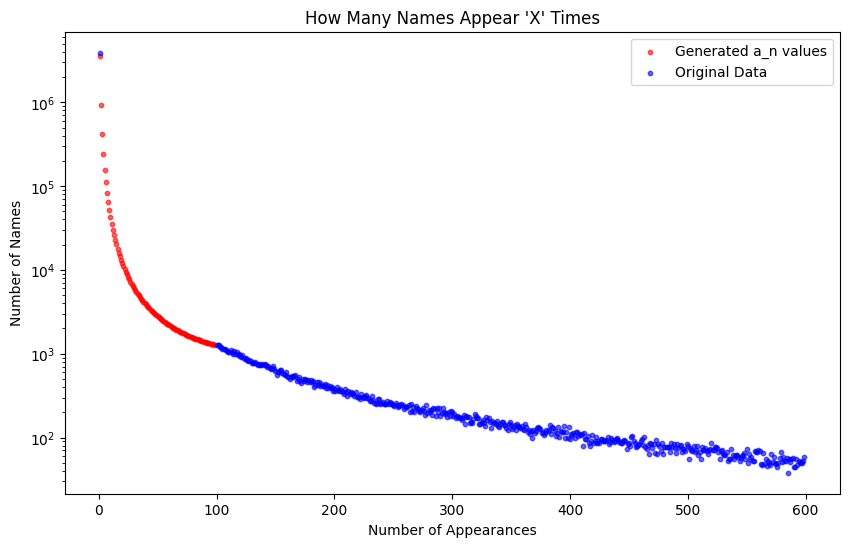

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Given constraints
target_sum = 6.137746 * 10**6
target_weighted_sum = 25.406 * 10**6
target_a98 = 1280
n_max = 98

# Function to compute a_n
def compute_sums(params):
    b, p, c = params  # Now includes c for exponential term
    n_values = np.arange(1, n_max + 1)
    a_n = b * n_values**p * np.exp(c * n_values)  # New function: b * n^p * e^(c*n)
    sum_a_n = np.sum(a_n)
    sum_weighted_a_n = np.sum(a_n * n_values)
    return sum_a_n, sum_weighted_a_n, a_n[-1]  # Return last term as well

# Objective function to minimize (difference from target values)
def objective(params):
    sum_a_n, sum_weighted_a_n, a98 = compute_sums(params)
    return (
        ((sum_a_n - target_sum)/target_sum)**2 +
        ((sum_weighted_a_n - target_weighted_sum)/target_weighted_sum)**2 +
        ((a98 - target_a98)/target_a98)**2  # Ensuring a_98 is close to target
    )

# Initial guess for [b, p, c]
initial_guess = [100000, -0.5, -0.0001]  # Adding a small negative c to control decay

# Minimize the objective function
result = minimize(objective, initial_guess, method='Nelder-Mead')

# Extract optimized parameters
b_opt, p_opt, c_opt = result.x

# Generate final a_n values
n_values = np.arange(1, n_max + 1)
a_n_values = b_opt * n_values**p_opt * np.exp(c_opt * n_values)  # Now includes exponential term

# Print results
print(f"Optimized b: {b_opt}")
print(f"Optimized p: {p_opt}")
print(f"Optimized c: {c_opt}")
print(f"Final a_98: {a_n_values[-1]}")
print(f"Sum of a_n: {np.sum(a_n_values)}")
print(f"Weighted sum of a_n: {np.sum(a_n_values * n_values)}")

# Scatter plot of generated and original data
plt.figure(figsize=(10, 6))
plt.scatter(n_values, a_n_values, label="Generated a_n values", color="red", s=10, alpha=0.6)
plt.scatter(x_data, y_data, label="Original Data", color="blue", s=10, alpha=0.6)

# Set logarithmic y-scale
plt.yscale("log")
plt.xlabel("Number of Appearances")
plt.ylabel("Number of Names")
plt.title("How Many Names Appear 'X' Times")
plt.legend()
plt.show()


In [ ]:
# Function to compute a_n for counts 2 to 99
def a_n(n, b, p, c):
    return b * (n ** p) * np.exp(-c * n)

# Generate counts 2 to 99
n_values = np.arange(2, 100)
a_n_values = a_n(n_values, b_opt, p_opt, c_opt)

# Create new dataframe for 1-99
df_new = pd.DataFrame({
    "count": np.append(1, n_values),
    "num_names": np.append(3.906e6, a_n_values)
})

# Append to existing dataframe and sort
df_updated = pd.concat([df_new, df_count_distribution], ignore_index=True).sort_values(by="count")
df_updated = df_updated.drop(df_updated.index[-1])

In [ ]:
count_to_names = {}

# Simulate (replace with real names data for actual use)
for count in df_updated['count']:
    num_names = df_updated[df_updated['count'] == count]["num_names"].values[0]
    # Create a list of "names" for each count group
    names = [f"Name_{count}_{i}" for i in range(int(num_names))]

    # Convert list to numpy array for efficient sampling
    count_to_names[count] = np.array(names, dtype=object)

In [ ]:
total_population = 282e6   # Example total population, adjust accordingly

df_updated["total_people"] = (df_updated["count"] * df_updated["num_names"])

df_updated["probability"] =  df_updated["total_people"] / df_updated["total_people"].sum()

df_updated["cdf"] = np.cumsum(df_updated["probability"])

# Verify the updated dataframe
print(df_updated)

         count     num_names  probability       cdf  total_people
0            1  3.906000e+06     0.013847  0.013847  3.906000e+06
1            2  8.832426e+05     0.006262  0.020110  1.766485e+06
2            3  3.924042e+05     0.004173  0.024283  1.177213e+06
3            4  2.199381e+05     0.003119  0.027402  8.797523e+05
4            5  1.400110e+05     0.002482  0.029884  7.000548e+05
...        ...           ...          ...       ...           ...
10324  1425470  1.000000e+00     0.005053  0.973631  1.425470e+06
10325  1437026  1.000000e+00     0.005094  0.978726  1.437026e+06
10326  1625252  1.000000e+00     0.005762  0.984487  1.625252e+06
10327  1932812  1.000000e+00     0.006852  0.991339  1.932812e+06
10328  2442977  1.000000e+00     0.008661  1.000000  2.442977e+06

[10329 rows x 5 columns]


In [ ]:
import numpy as np

# Function to sample surname counts using inverse transform sampling
def sample_surname_count(df_cdf, num_samples):
    random_values = np.random.uniform(0, 1, num_samples)  # Generate uniform random numbers
    sampled_counts = df_cdf["count"].iloc[np.searchsorted(df_cdf["cdf"], random_values)].values
    return sampled_counts

# Function to sample surnames from the count groups
def sample_surnames(df_cdf, count_to_names, num_samples):
    sampled_counts = sample_surname_count(df_cdf, num_samples)
    sampled_surnames = []

    for count in sampled_counts:
        # Skip counts of 1 since they cannot duplicate
        if count == 1:
            continue

        # For each sampled count, pick a surname randomly from that count group
        names_in_group = count_to_names[count]
        sampled_surnames.append(np.random.choice(names_in_group))

    return sampled_surnames

# Function to sample surnames and track duplicates
def count_duplicates(df_cdf, count_to_names, num_samples, num_tests = 1000):

    duplicate_count = 0
    all_duplicates = []

    for i in range(num_tests):
      sampled_surnames = sample_surnames(df_cdf, count_to_names, num_samples)
      seen_surnames = set()
      duplicates = [surname for surname in sampled_surnames if surname in seen_surnames or seen_surnames.add(surname)]

      if duplicates:
        all_duplicates.append(duplicates)
        duplicate_count += 1

    return duplicate_count / num_tests, all_duplicates

# Example: Track duplicates in a group of 100 samples
# duplicates = count_duplicates(df_updated, count_to_names, 100)

In [ ]:
sample_sizes = [47,48,49,50,51,52,53]
duplicate_counts = []
all_duplicate_names = []
for sample_size in sample_sizes:
  counts, duplicate_names = count_duplicates(df_updated, count_to_names, sample_size, num_tests = 10000)
  all_duplicate_names.append(duplicate_names)
  duplicate_counts.append(counts)
  print(counts)

0.4548
0.4677
0.4835
0.5007
0.5101
0.5317
0.5459


In [ ]:
sample_sizes = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
duplicate_counts = []
all_duplicate_names = []
for sample_size in sample_sizes:
  counts, duplicate_names = count_duplicates(df_updated, count_to_names, sample_size, num_tests = 10000)
  all_duplicate_names.append(duplicate_names)
  duplicate_counts.append(counts)
  print(counts)

0.0062
0.0255
0.0616
0.1047
0.1615
0.2266
0.2884
0.3541
0.4326
0.5004
0.5734
0.6265
0.6893
0.7347
0.7796
0.822
0.8614
0.8844
0.9051
0.9309
0.9456
0.9582
0.9671
0.9766


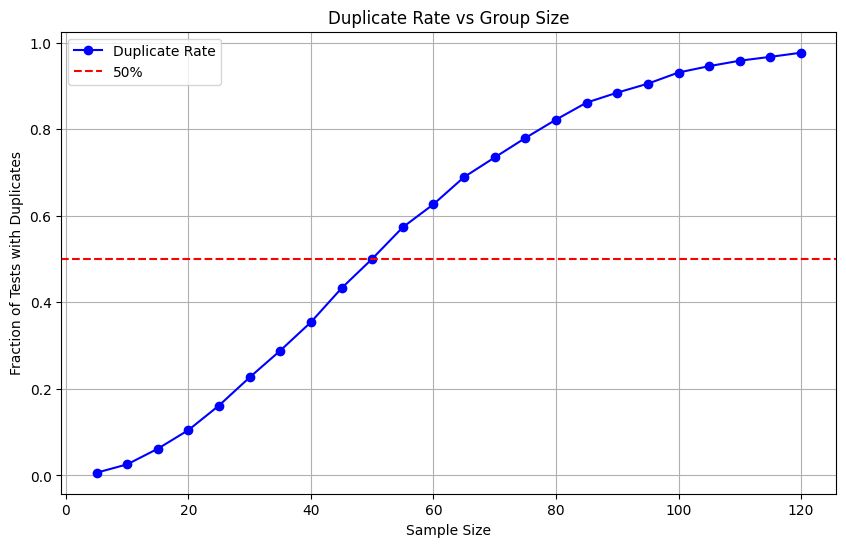

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sample_sizes, duplicate_counts, marker='o', linestyle='-', color='b', label='Duplicate Rate')
plt.xlabel('Sample Size')
plt.ylabel('Fraction of Tests with Duplicates')
plt.axhline(y=0.5, color='r', linestyle='--', label='50%')  # Adding the horizontal line at y=0.5
plt.title('Duplicate Rate vs Group Size')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(duplicate_counts)

[0.005, 0.027, 0.0638, 0.1062, 0.1566, 0.2336, 0.2854, 0.3678, 0.435, 0.5044, 0.5712, 0.6068, 0.684, 0.7388, 0.7804, 0.8258, 0.8648, 0.8812, 0.913, 0.93, 0.9424, 0.9562, 0.97, 0.9726]
